<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-examination" data-toc-modified-id="Data-examination-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data examination</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Calculations-and-adding-results-to-the-table" data-toc-modified-id="Calculations-and-adding-results-to-the-table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculations and adding results to the table</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Research of advertisements for the sale of apartments

We are given data from Yandex.Real Estate - an archive of ads for the sale of apartments in St. Petersburg and the number of settlements for several years. We need to build an automatic system that monitors anomalies and fraudulent activity. We have to set parameters to determine the market value of objects.

There are two types of data for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, the airport, the nearest park and reservoir.

According to the data documentation:

* `airports_nearest` — distance to the airport in meters (m)
* `balcony` — number of balconies
* `ceiling_height` - ceiling height (m)
* `cityCenters_nearest` — distance to city center (m)
* `days_exposition` - how many days the ad was placed (from publication to withdrawal)
* `first_day_exposition` — publication date
* `floor` - floor
* `floors_total` - total floors in the house
* `is_apartment` — apartment (boolean type)
* `kitchen_area` - kitchen area in square meters (m²)
* `last_price` - price at the time of removal from publication
* `living_area` - living area in square meters (meter²)
* `locality_name` - the name of the locality
* `open_plan` - free planning (boolean type)
* `parks_around3000` - number of parking lots within a 3 km radius
* `parks_nearest` — distance to the park (m)
* `ponds_around3000` - the number of ponds within a radius of 3 km
* `ponds_nearest` - distance to the nearest body of water (m)
* `rooms` - number of rooms
* `studio` - studio apartment (boolean)
* `total_area` - area of ​​the apartment in square meters (m²)
* `total_images` - the number of photos of the apartment in the ad

## Data examination

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [133]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [134]:
df.duplicated().sum()

0

**Conclusion**

The table has 20 columns, data types `bool`, `float`, `int`, `object`.

Problems to be solved:
* Incorrect jump case column names
* Very strange and mixed values, missing in many columns
* Strange data types
* Values in some columns are too large or too small
* Check for duplicates with corrected data

## Data preprocessing

In [135]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [136]:
new_columns = ['total_images',
               'last_price',
               'total_area',
               'first_day_exposition',
               'rooms',
               'ceiling_height',
               'floors_total',
               'living_area',
               'floor',
               'is_apartment',
               'is_studio',
               'is_open_plan',
               'kitchen_area',
               'balcony',
               'locality_name',
               'airports_nearest',
               'city_centers_nearest',
               'parks_around_3000',
               'parks_nearest',
               'ponds_around_3000',
               'ponds_nearest',
               'days_exposition']
df.set_axis(new_columns, axis='columns', inplace=True)
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'days_exposition']

In [137]:
df = df[['locality_name',
         'last_price',
         'is_apartment',
        'is_studio',
        'is_open_plan',
        'total_area',
        'living_area',
        'kitchen_area',
        'rooms',
        'ceiling_height',
        'floor',
        'floors_total',
         'balcony',
        'first_day_exposition',
        'days_exposition',
        'total_images',
        'airports_nearest',
        'city_centers_nearest',
        'parks_around_3000',
        'parks_nearest',
        'ponds_around_3000',
        'ponds_nearest']]
df.sample(2)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,balcony,first_day_exposition,days_exposition,total_images,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
57,посёлок Шушары,3200000.0,NaN,False,False,45.0,17.0,12.0,1,NaN,...,NaN,2017-10-25T00:00:00,173.0,7,13097.0,18883.0,0.0,NaN,1.0,649.0
2874,городской посёлок Новоселье,2300000.0,NaN,False,False,32.0,20.6,7.8,1,2.8,...,NaN,2018-02-09T00:00:00,414.0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df.isnull().sum().sort_values()

floor                       0
last_price                  0
total_images                0
is_studio                   0
is_open_plan                0
total_area                  0
first_day_exposition        0
rooms                       0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Some omissions are quite understandable: people do not know the exact distance or presence of this or that object near the house. Others are not entirely clear to me, it will be necessary to understand.

Let's go through the columns.

In [139]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [140]:
len(df['locality_name'].unique())

365

In [141]:
df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
len(df['locality_name'].unique())

331

In [142]:
df['locality_name'].isna().sum()

49

We have 49 passes. In fact, these data will not give us anything, we cannot replace them in any way, moreover, this data is small compared to the size of the entire sample, so their removal is not critical. Let's remove these lines

In [143]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

In [144]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

There is also lost data here, it would be most logical to bring them to False, since we cannot confirm the correctness of this statement

In [145]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

array([False,  True])

In [146]:
df['is_studio'].unique()

array([False,  True])

Everything is good here

In [147]:
df['is_open_plan'].unique()

array([False,  True])

Here as well

In [148]:
df.head(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,balcony,first_day_exposition,days_exposition,total_images,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
0,Санкт-Петербург,13000000.0,False,False,False,108.0,51.0,25.0,3,2.70,...,NaN,2019-03-07T00:00:00,NaN,20,18863.0,16028.0,1.0,482.0,2.0,755.0
1,поселок Шушары,3350000.0,False,False,False,40.4,18.6,11.0,1,NaN,...,2.0,2018-12-04T00:00:00,81.0,7,12817.0,18603.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,5196000.0,False,False,False,56.0,34.3,8.3,2,NaN,...,0.0,2015-08-20T00:00:00,558.0,10,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,64900000.0,False,False,False,159.0,NaN,NaN,3,NaN,...,0.0,2015-07-24T00:00:00,424.0,0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,10000000.0,False,False,False,100.0,32.0,41.0,2,3.03,...,NaN,2018-06-19T00:00:00,121.0,2,31856.0,8098.0,2.0,112.0,1.0,48.0


Great, the data looks better now

In [149]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [150]:
df['balcony'].value_counts()

1.0    4187
0.0    3725
2.0    3658
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

In [151]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [152]:
df['balcony'].value_counts()

0.0    15238
1.0     4187
2.0     3658
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

Everything is fine with the balconies, we replaced the missing data with 0, because the gap in the values is most likely due to the fact that these apartments do not have balconies and the seller decided to leave this field blank

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         23650 non-null  object 
 1   last_price            23650 non-null  float64
 2   is_apartment          23650 non-null  bool   
 3   is_studio             23650 non-null  bool   
 4   is_open_plan          23650 non-null  bool   
 5   total_area            23650 non-null  float64
 6   living_area           21752 non-null  float64
 7   kitchen_area          21381 non-null  float64
 8   rooms                 23650 non-null  int64  
 9   ceiling_height        14490 non-null  float64
 10  floor                 23650 non-null  int64  
 11  floors_total          23565 non-null  float64
 12  balcony               23650 non-null  float64
 13  first_day_exposition  23650 non-null  object 
 14  days_exposition       20470 non-null  float64
 15  total_images       

In [154]:
df['ceiling_height'].isna().sum()

9160

There are quite a lot of gaps in the ceilings, it would be logical to replace them with the median value for settlements

In [155]:
locality_names = df['locality_name'].unique()
for locality_name in locality_names:   
    median_ceiling_height = df.loc[df['locality_name'] == locality_name]['ceiling_height'].median()
    print(median_ceiling_height)
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality_name), 'ceiling_height'] = median_ceiling_height
    

2.7
2.63
2.65
2.64
2.7
2.55
2.6
2.55
2.6
2.75
2.5599999999999996
2.5
2.5
2.55
2.7
2.55
2.55
2.5
2.7
2.5
2.5
2.55
2.5
2.51
2.75
2.6
nan
2.7
2.58
2.5
2.5
2.7
2.75
2.55
2.65
2.5
nan
2.5
2.59
2.6
2.58
2.55
2.7
2.6
2.6500000000000004
2.5
2.55
2.52
2.7


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


2.5
2.56
2.55
2.5
2.5
2.75
2.73
2.6
2.6
2.525
2.5
2.5
2.5
2.55
2.75
2.5
2.5
2.5
2.6
2.55
2.5
2.75
2.5
2.55
3.9
2.77
2.6
2.6
2.55
2.6
2.55
2.6500000000000004
2.6
2.55
2.55
2.55
2.525
2.7
2.5
nan
2.575
2.5
2.6
2.65
2.55
2.5
2.5
2.6


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


2.5
2.5
2.8
2.5
2.55
2.5
2.75
nan
2.5
2.5549999999999997
2.75
2.5
2.75
2.55
2.55
2.55
2.5
2.55
2.525
nan
2.55
2.6
2.5
2.5149999999999997
2.6
2.5
2.7
2.5
2.5
2.6500000000000004
2.6
2.6
2.6
2.6
nan
2.65
2.7
2.55
2.55
2.55
nan
2.5
2.7
nan
2.7
27.0
2.55
2.55
3.2


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

2.56
2.65
2.5
2.55
2.525
2.5
2.625
2.6
nan
2.5
2.775
2.625
2.5
2.6
2.5
nan
2.6
2.5
2.5
nan
2.55
2.725
2.55
nan
nan
nan
2.52
2.5999999999999996
nan
2.5
2.5
nan
2.75
2.6
2.55
2.5
2.6
2.58
2.6
2.5
nan
2.6
2.55
nan
2.6
2.5
nan
2.5


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

2.6
2.5
2.6
nan
2.575
2.5
2.6
2.7
nan
2.5
2.7
2.615
2.5
2.55
2.52
2.65
2.85
2.625
nan
nan
nan
2.5
2.55
nan
2.5
2.525
2.5
2.5
2.5
2.62
2.6
2.7
2.5
2.55
nan
2.5
nan
nan
nan
nan
nan
2.55
2.7
nan
2.5
2.5
2.5


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

2.5
2.5
nan
2.55
nan
2.55
2.5
3.1
nan
2.615
2.55
2.5999999999999996
nan
2.625
2.6
2.55
nan
2.95
2.55
2.5
nan
2.575
2.5
2.6
2.5
3.0
2.5
nan
2.55
2.5
nan
2.625
2.6
2.5
2.675
nan
nan
2.5
2.5
2.5
nan
2.575
nan
2.5
nan
2.65
nan
2.7
2.5
3.0
nan
nan
nan
nan
nan
nan
nan
nan
3.15
2.55
nan
nan
nan
2.45
2.55
2.53
nan
nan
nan
nan
2.7
2.6
nan
2.6
nan
2.5
nan
nan
nan
nan
nan
2.6
nan
nan
27.0
nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

nan
2.7
2.5


In [156]:
df['ceiling_height'].isna().sum()

106

There are 106 gaps left, we will fill them with the median over the entire column

In [157]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [158]:
df['ceiling_height'].isna().sum()

0

In [159]:
df.isnull().sum().sort_values()

locality_name               0
total_images                0
first_day_exposition        0
balcony                     0
ceiling_height              0
rooms                       0
floor                       0
total_area                  0
is_open_plan                0
is_studio                   0
is_apartment                0
last_price                  0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
ponds_around_3000        5510
parks_around_3000        5510
city_centers_nearest     5511
airports_nearest         5534
ponds_nearest           14565
parks_nearest           15586
dtype: int64

We have processed all the data we need, but we still have a lot of gaps. I can assume that many of them are related to the fact that people do not know this information or consider that it is irrelevant and simply decide not to enter the values. Most likely in such cases, it will be either 0, or the usual ignorance of the area

## Calculations and adding results to the table

Let's start by calculating the price per square meter and add the data to the table

In [160]:
df['price_per_meter'] = df['last_price'] / df['total_area']
df['price_per_meter'] = df['price_per_meter'].round(decimals=1)
df.sample(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,first_day_exposition,days_exposition,total_images,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter
11670,Санкт-Петербург,9800000.0,False,False,False,84.0,41.1,16.3,3,2.7,...,2019-03-30T00:00:00,NaN,1,37948.0,14769.0,0.0,NaN,0.0,NaN,116666.7
14546,Санкт-Петербург,6580000.0,False,False,False,60.0,31.9,12.1,2,2.7,...,2018-02-20T00:00:00,112.0,20,21460.0,16788.0,0.0,NaN,1.0,170.0,109666.7
6147,Пушкин,3190000.0,False,False,False,42.0,NaN,NaN,1,2.6,...,2017-04-22T00:00:00,243.0,5,21055.0,29582.0,1.0,728.0,1.0,524.0,75952.4
9257,Санкт-Петербург,8400000.0,False,False,False,66.0,31.0,16.0,2,2.7,...,2017-11-26T00:00:00,202.0,11,51443.0,13370.0,1.0,805.0,0.0,NaN,127272.7
5001,Санкт-Петербург,7500000.0,False,False,False,93.0,70.0,10.0,4,3.0,...,2018-06-21T00:00:00,255.0,8,21695.0,3604.0,0.0,NaN,1.0,812.0,80645.2


Also, the prices in the `last_price` and `price_per_meter` columns are too large, I think this is due to the fact that they are in thousands. I propose to convert them to millions.

In [161]:
df['last_price'] = (df[df['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
df['price_per_meter'] = (df[df['price_per_meter'].notnull()]['price_per_meter']/1000*1.0).round(3)
df.sample()

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,first_day_exposition,days_exposition,total_images,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter
13229,Санкт-Петербург,8300,False,False,False,80.0,51.0,13.2,3,2.7,...,2018-01-15T00:00:00,40.0,1,27166.0,4854.0,1.0,428.0,1.0,725.0,103.75


The price per square meter has been successfully added, let's move on to the days of the week, month and year of publication of the announcement. To do this, first change the data type in the column

In [162]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
df.head(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,first_day_exposition,days_exposition,total_images,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter
0,Санкт-Петербург,13000,False,False,False,108.0,51.0,25.0,3,2.70,...,2019-03-07,NaN,20,18863.0,16028.0,1.0,482.0,2.0,755.0,120.370
1,поселок Шушары,3350,False,False,False,40.4,18.6,11.0,1,2.63,...,2018-12-04,81.0,7,12817.0,18603.0,0.0,NaN,0.0,NaN,82.921
2,Санкт-Петербург,5196,False,False,False,56.0,34.3,8.3,2,2.70,...,2015-08-20,558.0,10,21741.0,13933.0,1.0,90.0,2.0,574.0,92.786
3,Санкт-Петербург,64900,False,False,False,159.0,NaN,NaN,3,2.70,...,2015-07-24,424.0,0,28098.0,6800.0,2.0,84.0,3.0,234.0,408.176
4,Санкт-Петербург,10000,False,False,False,100.0,32.0,41.0,2,3.03,...,2018-06-19,121.0,2,31856.0,8098.0,2.0,112.0,1.0,48.0,100.000


In [163]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.sample(10)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition
12648,Санкт-Петербург,8390,False,False,False,61.1,34.8,8.5,3,2.70,...,11135.0,8945.0,1.0,451.0,0.0,NaN,137.316,5,8,2017
13407,Санкт-Петербург,5870,False,False,False,52.0,30.0,8.0,2,2.70,...,35242.0,11273.0,0.0,NaN,0.0,NaN,112.885,4,9,2017
19137,Санкт-Петербург,10990,False,False,False,100.2,55.7,10.6,3,2.80,...,33272.0,12990.0,0.0,NaN,0.0,NaN,109.681,6,2,2018
6922,Санкт-Петербург,29999,False,False,False,133.5,71.7,19.8,3,3.00,...,31656.0,8733.0,1.0,562.0,1.0,522.0,224.712,0,12,2014
10684,Санкт-Петербург,32894,False,False,False,364.7,NaN,NaN,7,3.32,...,NaN,NaN,NaN,NaN,NaN,NaN,90.195,3,5,2019
9398,поселок Мурино,4250,False,False,False,55.0,32.0,12.2,2,2.70,...,NaN,NaN,NaN,NaN,NaN,NaN,77.273,3,3,2018
3613,Пушкин,3800,False,False,False,44.0,28.0,6.0,2,2.50,...,14279.0,26433.0,0.0,NaN,0.0,NaN,86.364,3,4,2018
20100,Санкт-Петербург,8750,False,False,False,49.0,17.0,12.0,1,3.00,...,32121.0,5080.0,0.0,NaN,3.0,457.0,178.571,6,9,2018
17857,Санкт-Петербург,3900,False,False,False,56.0,33.0,NaN,3,27.00,...,41030.0,15543.0,0.0,NaN,0.0,NaN,69.643,4,12,2017
15326,Колпино,3270,False,False,False,49.7,27.3,9.1,2,2.80,...,28554.0,34340.0,0.0,NaN,3.0,287.0,65.795,6,2,2016


In `weekday_exposition` we have zeros, according to the documentation for the weekday method it follows that 0 is Monday and 6 is Sunday. For convenience, I will redo 1 for Monday

In [164]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday + 1
df.sample(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition
18339,Санкт-Петербург,9400,False,False,False,63.0,31.7,13.0,2,2.70,...,19499.0,4844.0,0.0,NaN,1.0,503.0,149.206,3,7,2016
12146,Санкт-Петербург,8900,False,False,False,81.4,55.7,9.8,2,3.33,...,24851.0,4418.0,1.0,748.0,3.0,528.0,109.337,4,6,2017
4975,поселок Парголово,4000,False,False,False,38.0,16.0,10.0,1,2.75,...,53561.0,19070.0,0.0,NaN,0.0,NaN,105.263,5,3,2016
22938,деревня Нижняя,4000,True,False,False,98.0,73.0,9.0,4,27.00,...,NaN,NaN,NaN,NaN,NaN,NaN,40.816,4,3,2018
10885,Санкт-Петербург,5150,False,False,False,41.0,18.0,10.0,1,2.70,...,7201.0,13417.0,1.0,1199.0,0.0,NaN,125.610,5,11,2017


Dates are distributed, let's move on to the floors. It is necessary to distribute the floors as follows: `first`, `last` and `another`. To do this, write a function using if-else

In [165]:
def floor_level(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'another'
df['floor_level'] = df.apply(floor_level, axis=1)
df.sample(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_level
19281,Санкт-Петербург,5400,False,False,False,39.4,17.5,10.3,1,2.60,...,14329.0,1.0,1477.0,1.0,392.0,137.056,2,8,2018,another
6244,поселок Шушары,2600,False,False,False,31.4,17.7,5.5,1,2.50,...,18251.0,0.0,NaN,0.0,NaN,82.802,4,5,2017,another
22167,Новая Ладога,1100,False,False,False,35.7,17.4,9.0,1,2.50,...,NaN,NaN,NaN,NaN,NaN,30.812,2,3,2019,last
13649,Санкт-Петербург,4100,False,False,False,60.0,46.0,6.0,3,2.55,...,16110.0,2.0,305.0,2.0,143.0,68.333,4,2,2018,another
15982,Санкт-Петербург,5900,False,False,False,62.0,34.0,10.0,2,2.70,...,20444.0,0.0,NaN,3.0,80.0,95.161,7,3,2015,another


Floors added. The last two columns remain: the ratio of living and total area, as well as the ratio of kitchen area to total.

In [166]:
df['average_living_area'] = df['living_area'] / df['total_area']
df['average_kitchen_area'] = df['kitchen_area'] / df['total_area']
df.head(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_level,average_living_area,average_kitchen_area
0,Санкт-Петербург,13000,False,False,False,108.0,51.0,25.0,3,2.70,...,482.0,2.0,755.0,120.370,4,3,2019,another,0.472222,0.231481
1,поселок Шушары,3350,False,False,False,40.4,18.6,11.0,1,2.63,...,NaN,0.0,NaN,82.921,2,12,2018,first,0.460396,0.272277
2,Санкт-Петербург,5196,False,False,False,56.0,34.3,8.3,2,2.70,...,90.0,2.0,574.0,92.786,4,8,2015,another,0.612500,0.148214
3,Санкт-Петербург,64900,False,False,False,159.0,NaN,NaN,3,2.70,...,84.0,3.0,234.0,408.176,5,7,2015,another,NaN,NaN
4,Санкт-Петербург,10000,False,False,False,100.0,32.0,41.0,2,3.03,...,112.0,1.0,48.0,100.000,2,6,2018,another,0.320000,0.410000


All columns added!

Unfortunately, we do not have enough data for living space and kitchen area, we cannot replace them either, since they depend on the area of the apartment itself and are always distributed in a certain way. Accordingly, neither the median nor 0 will help us in this case.

## Exploratory data analysis

To begin with, we need to examine each of the parameters: Area, price, number of rooms and ceiling height. For each of the parameters, we construct histograms.

First we need to understand the parameters of the histogram, and for this we need to determine the outliers for each of the parameters.

In [167]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,23650.00000,23650.000000,23650.000000
mean,60.329069,6541.12685,2.070106,2.732203
std,35.661808,10896.39876,1.078620,1.002602
min,12.000000,12.00000,0.000000,1.000000
25%,40.000000,3400.00000,1.000000,2.550000
50%,52.000000,4650.00000,2.000000,2.700000
75%,69.700000,6799.00000,3.000000,2.700000
max,900.000000,763000.00000,19.000000,100.000000


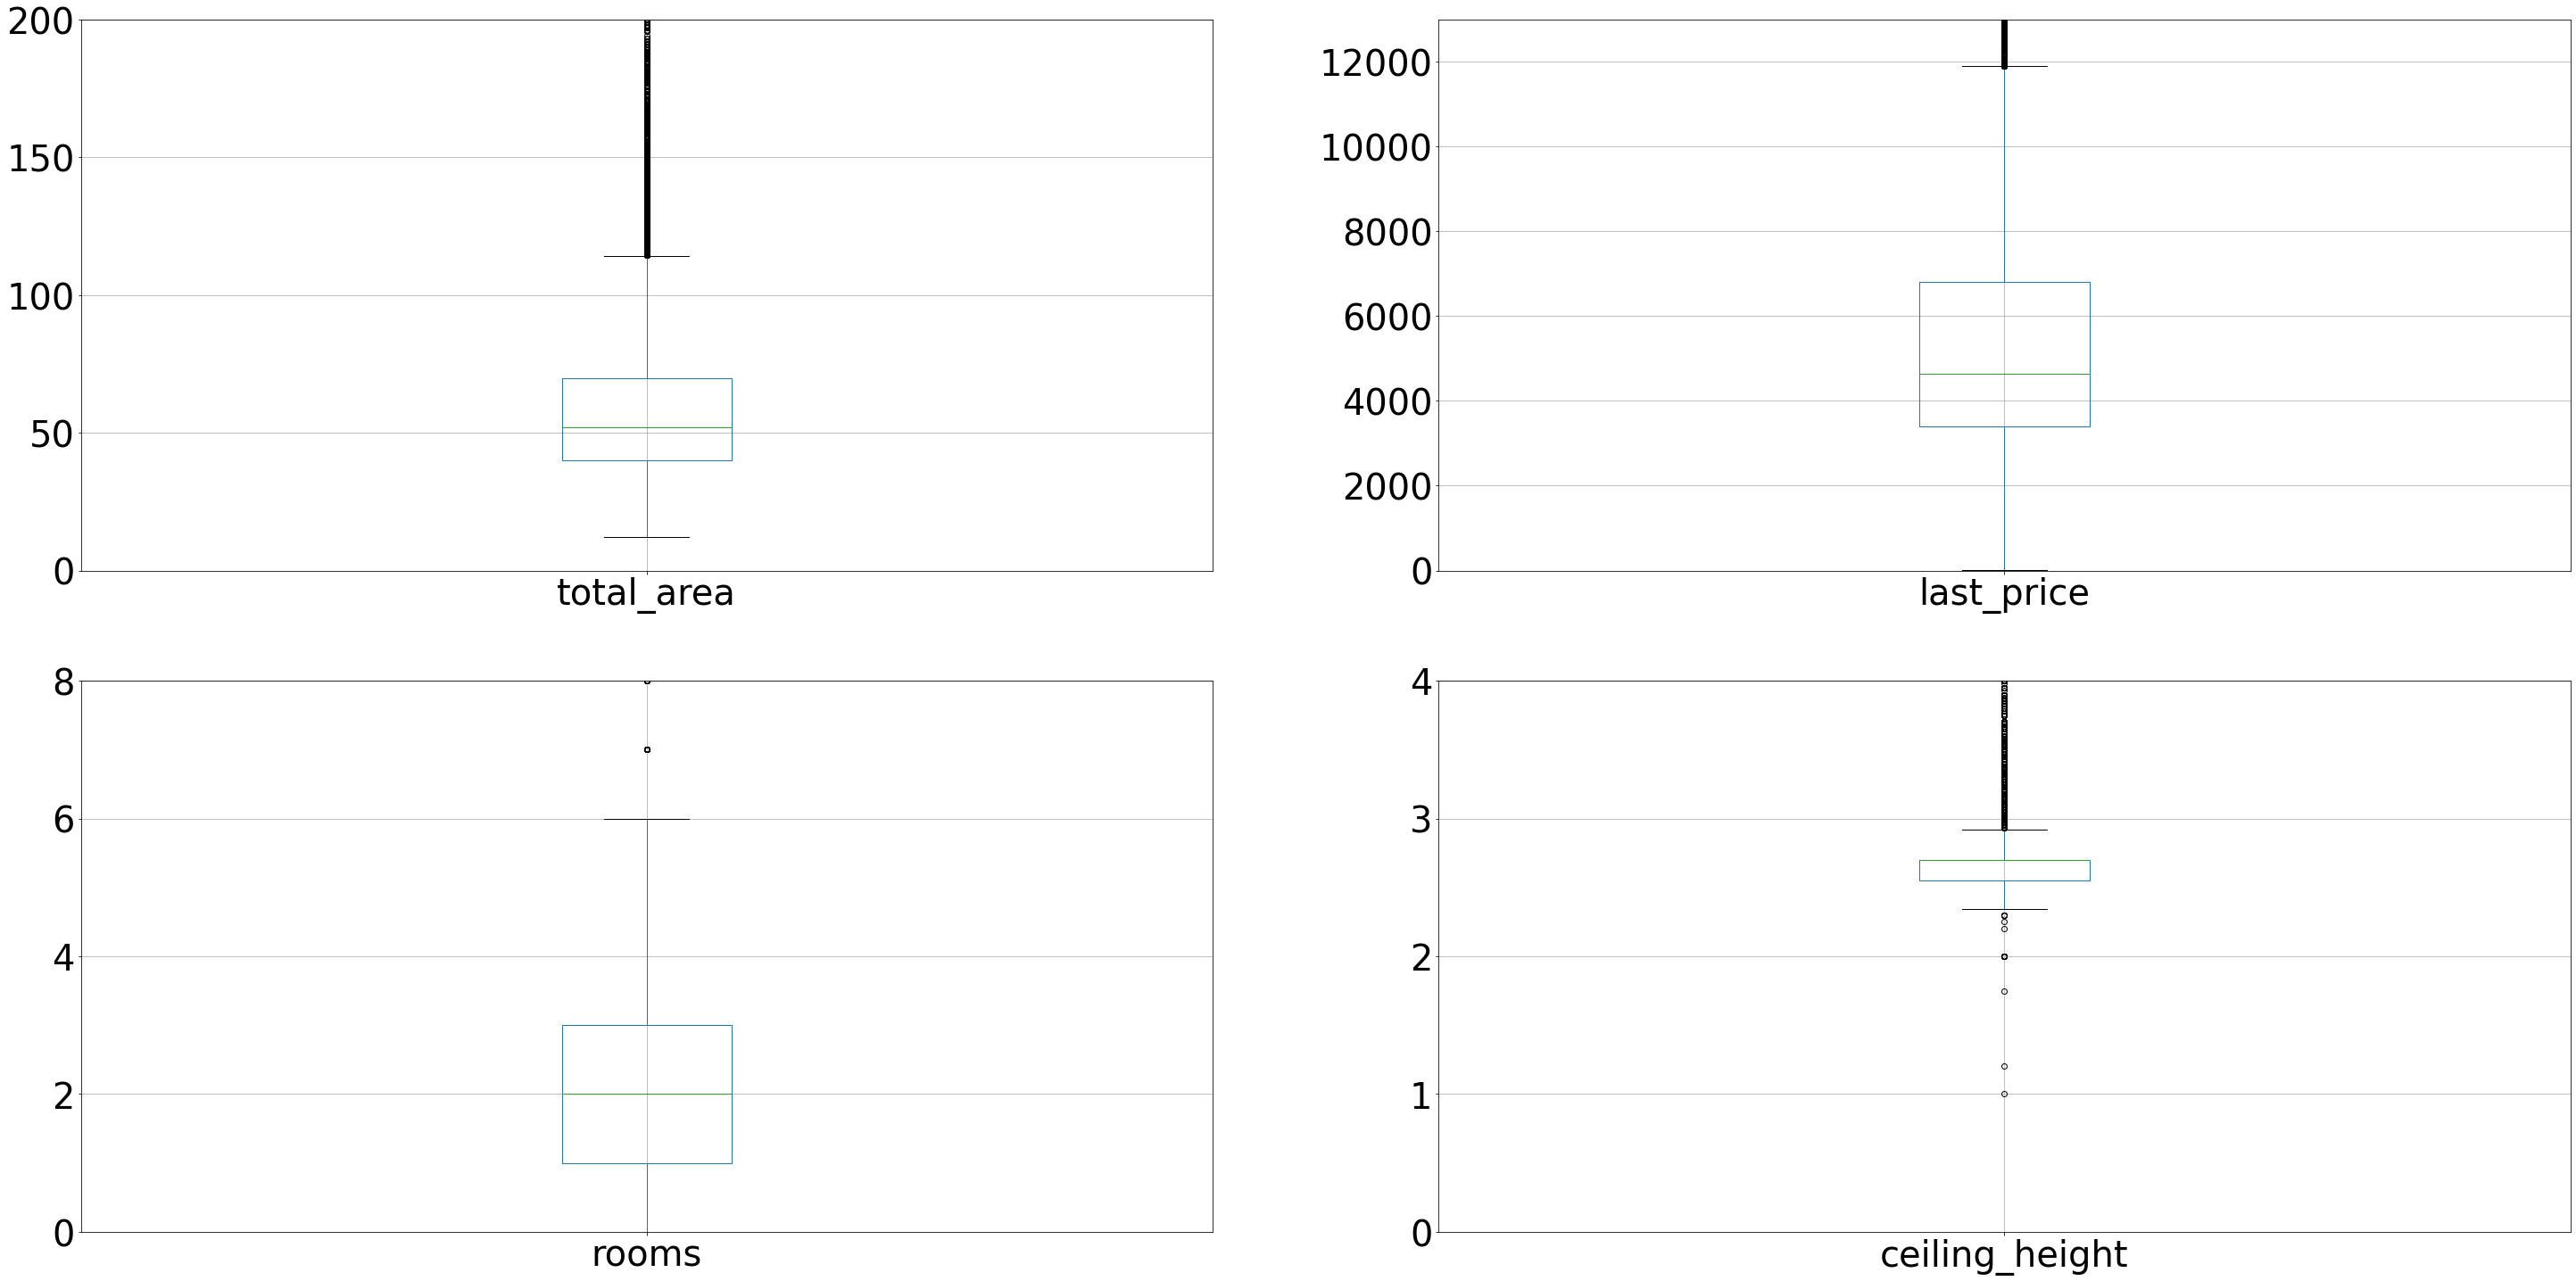

In [168]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [200, 13000, 8, 4]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Great, now we can clearly see the outliers and the boundaries along which we will display the histograms.
Let's define these boundaries like this:

* `total_area` - from 20 to 120
* `last_price` - from 0 to 12000
* `rooms` - from 0 to 6
* `ceiling_height` - from 2 to 4.5

Now we can build histograms

Text(0, 0.5, 'Count')

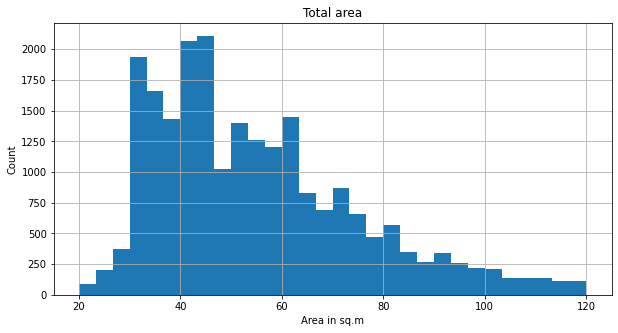

In [169]:
df['total_area'].hist(bins = 30,range=(20, 120), figsize=(10,5))
plt.title("Total area")
plt.xlabel("Area in sq.m")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

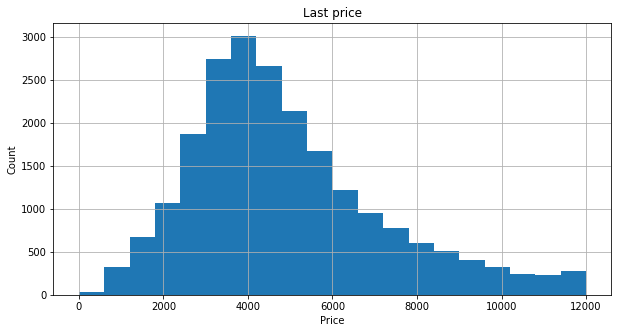

In [170]:
df['last_price'].hist(bins = 20,range=(0, 12000), figsize=(10,5))
plt.title("Last price")
plt.xlabel("Price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

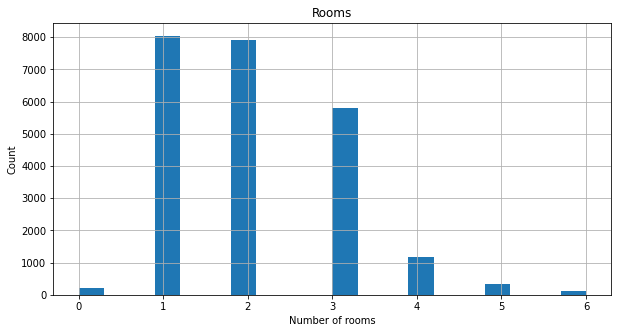

In [171]:
df['rooms'].hist(bins = 20,range=(0, 6), figsize=(10,5))
plt.title("Rooms")
plt.xlabel("Number of rooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

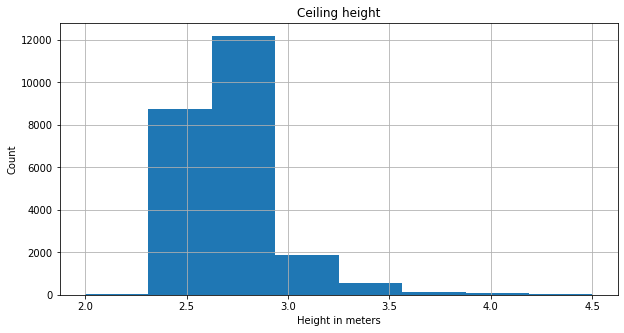

In [172]:
df['ceiling_height'].hist(bins = 8,range=(2, 4.5), figsize=(10,5))
plt.title("Ceiling height")
plt.xlabel("Height in meters")
plt.ylabel("Count")

**Conclusions:**

* Most of the apartments have an area of 30 to 62 sq.m. The maximum number of apartments has an area of ​​approximately 42-44 sq.m. The largest indicator for apartments shows 900 sq.m, but this is rather just an outlier.
* For prices: Most apartments are in the range from 3 to 5 million rubles. The highest price for apartments is 763 million rubles, but this is an outlier.
* Most of the apartments have one room, most likely studio apartments, we also have 2 and 3 rooms in the top of the rooms. The maximum number of rooms we have is 19, but this is rather strange and this is an outlier.
* On ceilings: The largest number of apartments have ceilings with a height of 2.6 - 2.9 m, and many have apartments with ceilings of 2.3 - 2.5 m. The largest ceiling in our 100-meter apartment is an outlier, perhaps the seller mixed it up and entered the area instead of the height of the ceilings.

Now let's study the time of sale of the apartment

In [173]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [174]:
df['days_exposition'].median()

95.0

Text(0, 0.5, 'Count')

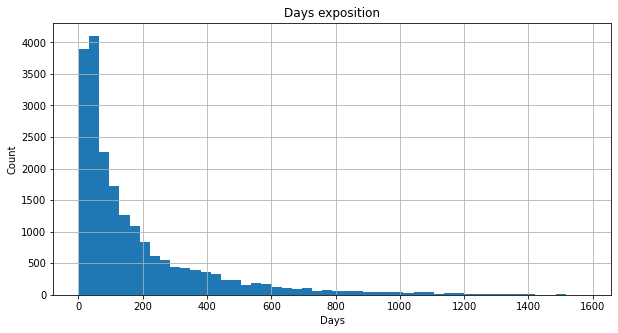

In [175]:
df['days_exposition'].hist(bins=50, figsize=(10,5))
plt.title("Days exposition")
plt.xlabel("Days")
plt.ylabel("Count")

The average time to sell an apartment is 180 days, about half a year, the median time is 95 days, about 3 months. These figures are very good. Our highest rate is 1580 days, which is about 4.5 years, a little strange, but quite possibly the owner simply did not deal with it and forgot about the announcement.
According to the histogram, we can say that most apartments are sold in the first 40-50 days, then the graph goes down. I also want to look at the chart in a little more detail, I will limit it to 400.

Text(0, 0.5, 'Count')

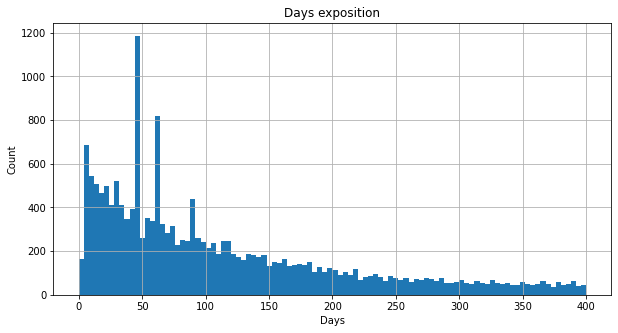

In [176]:
df['days_exposition'].hist(bins=100,range=(0,400), figsize=(10,5))
plt.title("Days exposition")
plt.xlabel("Days")
plt.ylabel("Count")

In [177]:
df['days_exposition'].value_counts().head()

45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
Name: days_exposition, dtype: int64

In general, everything is correct, the values ​​of 45 and 60 stand out, these days the maximum number of purchases is completely, which is rather strange, perhaps this is somehow connected with the service itself, for example, the ad is removed automatically after this period, but in general the result is not changes.

Now we will remove rare and outlier values, that is, values that go beyond the "whiskers"

In [178]:
df.describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,balcony,days_exposition,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,average_living_area,average_kitchen_area
count,23650.00000,23650.000000,21752.000000,21381.000000,23650.000000,23650.000000,23650.000000,23565.000000,23650.000000,20470.000000,...,18140.000000,8064.000000,18140.000000,9085.000000,23650.000000,23650.000000,23650.000000,23650.000000,21752.000000,21381.000000
mean,6541.12685,60.329069,34.448356,10.566403,2.070106,2.732203,5.893277,10.675875,0.591712,180.753200,...,0.611577,490.830729,0.769680,518.059879,99.432245,3.568710,6.401564,2017.370021,0.564750,0.187372
std,10896.39876,35.661808,22.037664,5.901753,1.078620,1.002602,4.883317,6.594823,0.959662,219.777916,...,0.802003,342.554386,0.937948,277.841733,50.337934,1.788808,3.491418,1.037806,0.105385,0.072972
min,12.00000,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,13.000000,0.112000,1.000000,1.000000,2014.000000,0.021583,0.025381
25%,3400.00000,40.000000,18.600000,7.000000,1.000000,2.550000,2.000000,5.000000,0.000000,45.000000,...,0.000000,288.000000,0.000000,293.000000,76.615000,2.000000,3.000000,2017.000000,0.495157,0.133333
50%,4650.00000,52.000000,30.000000,9.100000,2.000000,2.700000,4.000000,9.000000,0.000000,95.000000,...,0.000000,454.500000,1.000000,502.000000,95.000000,4.000000,6.000000,2017.000000,0.567860,0.172414
75%,6799.00000,69.700000,42.300000,12.000000,3.000000,2.700000,8.000000,16.000000,1.000000,231.000000,...,1.000000,612.000000,1.000000,730.000000,114.274000,5.000000,10.000000,2018.000000,0.637778,0.232432
max,763000.00000,900.000000,409.700000,112.000000,19.000000,100.000000,33.000000,60.000000,5.000000,1580.000000,...,3.000000,3190.000000,3.000000,1344.000000,1907.500000,7.000000,12.000000,2019.000000,1.000000,0.787879


Let's take some values from the table, or rather: `last_price`, `total_area`, `living_area`, `kitchen_area`, `rooms`, `ceiling_height`, `days_exposition`, `price_of_m2`.
First, let's find out where we end up with a mustache for each of the values, we will find the value of Q1 in the 4th line of the describe () column

In [179]:
new_columns = ['last_price', 'total_area', 'living_area', 'kitchen_area',
              'rooms', 'ceiling_height', 'days_exposition', 'price_per_meter']
for column in new_columns:
    q1=df[column].describe()[4]
    q3=df[column].describe()[6]
    iqa=q3-q1
    top = q3 + 1.5 * iqa
    print(column, top) 
df['rooms'].describe()

last_price 11897.5
total_area 114.25
living_area 77.85
kitchen_area 19.5
rooms 6.0
ceiling_height 2.9250000000000007
days_exposition 510.0
price_per_meter 170.76250000000002


count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [180]:
#Let's start removing the mustache, start with last_price
df = df.query('last_price < 11897 and total_area < 114 and living_area < 77.85 and kitchen_area < 19.5 and rooms < 6 and ceiling_height < 2.92 and days_exposition < 510 and price_per_meter < 170.7')
df

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_level,average_living_area,average_kitchen_area
1,поселок Шушары,3350,False,False,False,40.40,18.60,11.00,1,2.63,...,NaN,0.0,NaN,82.921,2,12,2018,first,0.460396,0.272277
5,городской поселок Янино-1,2890,False,False,False,30.40,14.40,9.10,1,2.65,...,NaN,NaN,NaN,95.066,1,9,2018,another,0.473684,0.299342
6,поселок Парголово,3700,False,False,False,37.30,10.60,14.40,1,2.64,...,NaN,0.0,NaN,99.196,4,11,2017,another,0.284182,0.386059
8,поселок Мурино,2900,False,False,False,33.16,15.43,8.81,1,2.70,...,NaN,NaN,NaN,87.455,3,5,2018,another,0.465320,0.265682
9,Санкт-Петербург,5400,False,False,False,61.00,43.60,6.50,3,2.50,...,NaN,0.0,NaN,88.525,7,2,2017,another,0.714754,0.106557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,Санкт-Петербург,3550,False,False,False,35.30,16.30,9.10,1,2.86,...,353.0,2.0,652.0,100.567,3,2,2018,another,0.461756,0.257790
23690,Санкт-Петербург,5500,False,False,False,52.00,31.00,6.00,2,2.70,...,300.0,0.0,NaN,105.769,4,7,2018,another,0.596154,0.115385
23692,Тихвин,1350,False,False,False,30.00,17.50,6.00,1,2.60,...,NaN,NaN,NaN,45.000,5,7,2017,another,0.583333,0.200000
23693,Петергоф,4600,False,False,False,62.40,40.00,8.00,3,2.60,...,352.0,1.0,675.0,73.718,5,8,2016,another,0.641026,0.128205


Next, we go to the factors that affect the cost of an apartment. Here we will study whether the price depends on the area, number of rooms, distance from the center, the dependence of the price on which floor the apartment is located on: first, last or other, and we will also study if it depends on the date of placement.

In [181]:
#To begin with, let's study the dependence between price and area.

lt = df[['last_price', 'total_area']]
lt

,last_price,total_area
1,3350,40.40
5,2890,30.40
6,3700,37.30
8,2900,33.16
9,5400,61.00
...,...,...
23689,3550,35.30
23690,5500,52.00
23692,1350,30.00
23693,4600,62.40


Text(0, 0.5, 'Price')

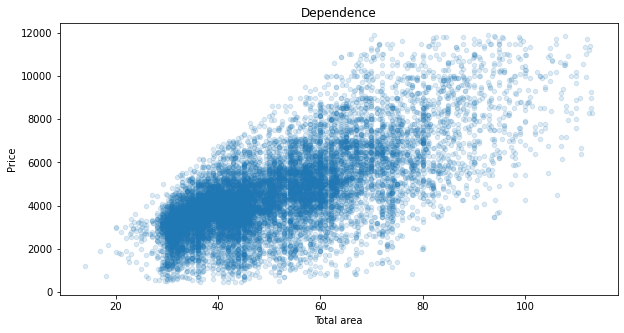

In [182]:
lt.plot(x='total_area', y='last_price', kind='scatter', alpha=0.15, figsize=(10,5))
plt.title("Dependence")
plt.xlabel("Total area")
plt.ylabel("Price")

In [183]:
print(lt['total_area'].corr(lt['last_price']))

0.6957407447721545


On the graph, we see that with an increase in the area, the price also increases, this is also proved by the correlation indicator, that is, more area - more price.

In [184]:
#let's move to the rooms
lr = df[['last_price', 'rooms']]
lr

,last_price,rooms
1,3350,1
5,2890,1
6,3700,1
8,2900,1
9,5400,3
...,...,...
23689,3550,1
23690,5500,2
23692,1350,1
23693,4600,3


Text(0, 0.5, 'Price')

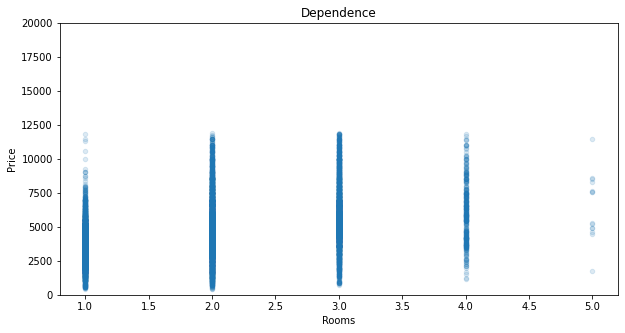

In [185]:
lr.plot(x='rooms', y='last_price', kind='scatter', ylim = (0, 20000), alpha=0.15, figsize=(10,5))
plt.title("Dependence")
plt.xlabel("Rooms")
plt.ylabel("Price")

In [186]:
print(lr['rooms'].corr(lr['last_price']))

0.4361525884741202


The graph also clearly shows, this is also proved by the correlation, that the price grows with an increase in the number of rooms, which is logical, but it grows up to about 5 rooms, I think the rest is emissions

Text(0, 0.5, 'Price')

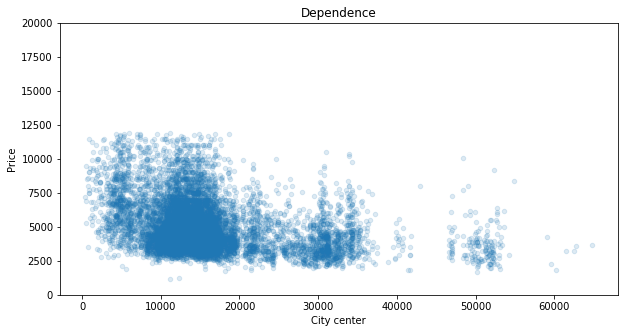

In [187]:
#let's see what's up with the center
lc = df[['city_centers_nearest', 'last_price']]
lc.plot(x='city_centers_nearest', y='last_price', kind='scatter', ylim = (0, 20000), alpha=0.15, figsize=(10,5))
plt.title("Dependence")
plt.xlabel("City center")
plt.ylabel("Price")

In [188]:
print(lc['city_centers_nearest'].corr(lc['last_price']))

-0.30581238152727713


Here we see an inverse relationship, but it is understandable, the closer the apartments are to the center, the more expensive the price, so here everything converges according to the graph and correlation

Text(0, 0.5, 'Price')

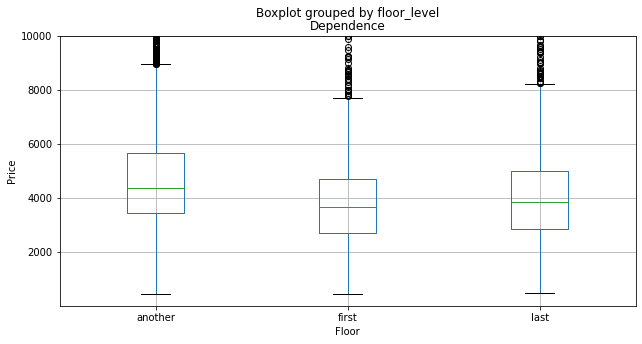

In [189]:
#теперь изучить зависимость от этажа
lf = df[['floor_level', 'last_price']]
lf.boxplot(column = 'last_price', by = 'floor_level', figsize=(10,5))
plt.ylim(1, 10000)
plt.title("Dependence")
plt.xlabel("Floor")
plt.ylabel("Price")

Here we see, in general, the obvious - at the extreme floors, the price is usually lower, especially at the first floor, and this is how it was displayed on the chart. Few people want to live on the first floor: there is noise under the windows, people always see what is happening in the apartment.

In [190]:
df.describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,balcony,days_exposition,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,average_living_area,average_kitchen_area
count,13852.000000,13852.000000,13852.000000,13852.000000,13852.000000,13852.000000,13852.000000,13829.000000,13852.000000,13852.000000,...,10494.000000,4012.000000,10494.000000,4739.000000,13852.000000,13852.000000,13852.000000,13852.000000,13852.000000,13852.000000
mean,4540.843777,50.803015,28.943512,9.084133,1.863052,2.633594,6.104678,11.168920,0.647488,126.230219,...,0.493139,492.934945,0.636554,548.252796,90.172617,3.576740,6.655068,2017.346087,0.559993,0.189173
std,1913.054928,16.088200,11.729818,2.852941,0.841200,0.099292,4.942659,6.606164,0.949892,119.523448,...,0.714381,325.963999,0.833391,273.879532,26.252342,1.782876,3.449837,0.847768,0.099226,0.064626
min,450.000000,14.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,16.000000,9.615000,1.000000,1.000000,2015.000000,0.069588,0.043524
25%,3300.000000,38.000000,18.000000,7.000000,1.000000,2.550000,2.000000,5.000000,0.000000,38.000000,...,0.000000,300.000000,0.000000,335.000000,74.576000,2.000000,3.000000,2017.000000,0.491525,0.138889
50%,4200.000000,46.600000,28.200000,8.700000,2.000000,2.650000,5.000000,9.000000,0.000000,84.000000,...,0.000000,461.500000,0.000000,544.000000,91.296500,4.000000,7.000000,2017.000000,0.562500,0.178249
75%,5500.000000,60.300000,37.000000,10.800000,2.000000,2.700000,8.000000,16.000000,1.000000,179.250000,...,1.000000,619.000000,1.000000,756.000000,106.452000,5.000000,10.000000,2018.000000,0.629562,0.234326
max,11880.000000,113.200000,77.000000,19.420000,5.000000,2.900000,33.000000,60.000000,5.000000,509.000000,...,3.000000,3190.000000,3.000000,1344.000000,170.648000,7.000000,12.000000,2019.000000,0.973262,0.739837


In [191]:
# Let's analyze the dependence on the placement date
ld = df[['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']]
ld.head()

,last_price,weekday_exposition,month_exposition,year_exposition
1,3350,2,12,2018
5,2890,1,9,2018
6,3700,4,11,2017
8,2900,3,5,2018
9,5400,7,2,2017


Text(0, 0.5, 'Price')

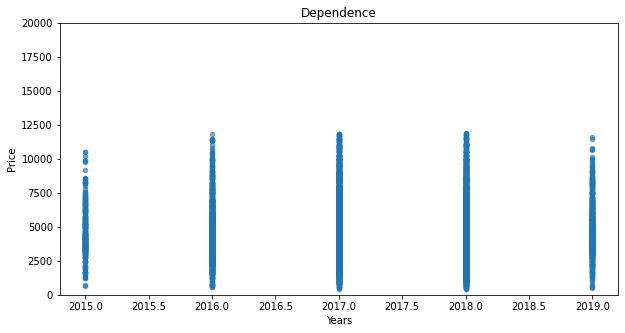

In [192]:
ld.plot(x='year_exposition', y='last_price', kind='scatter', ylim = (0, 20000), alpha=0.6, figsize=(10,5))
plt.title("Dependence")
plt.xlabel("Years")
plt.ylabel("Price")

Text(0, 0.5, 'Years')

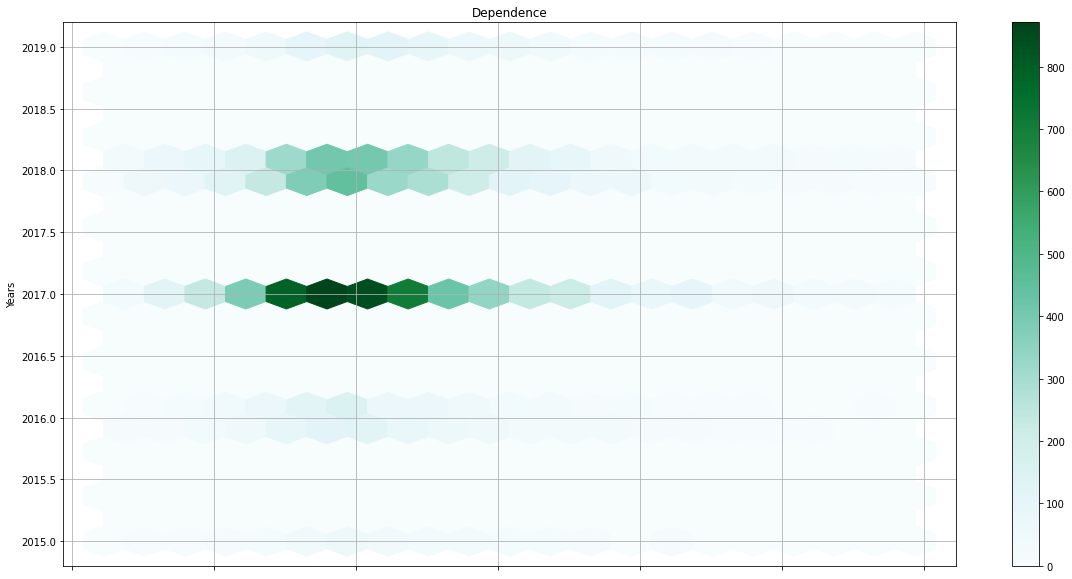

In [193]:
ld.plot(x='last_price', y='year_exposition', kind='hexbin', gridsize=20, figsize=(20, 10), grid=True)
plt.title("Dependence")
plt.ylabel("Years")

Text(0, 0.5, 'Price')

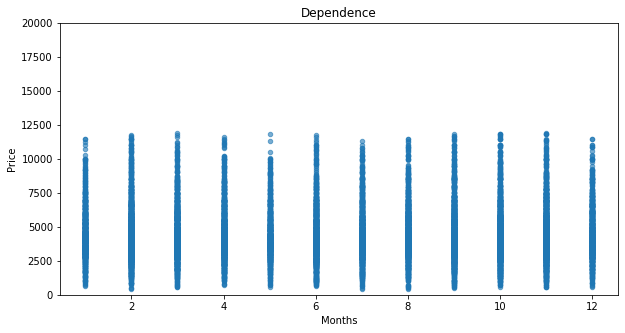

In [194]:
ld.plot(x='month_exposition', y='last_price', kind='scatter', ylim = (0, 20000), alpha=0.6, figsize=(10,5))
plt.title("Dependence")
plt.xlabel("Months")
plt.ylabel("Price")

Text(0, 0.5, 'Months')

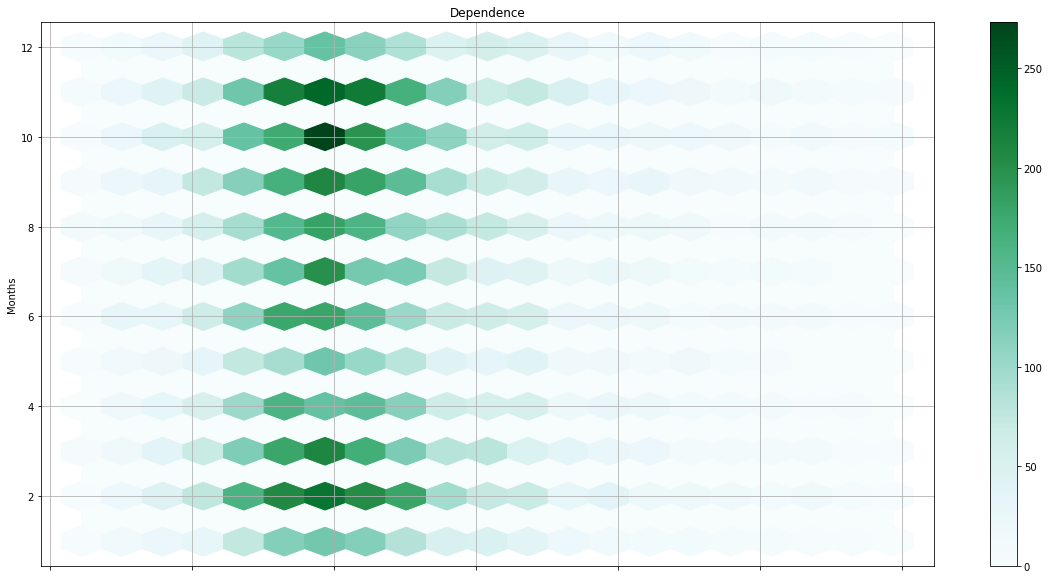

In [195]:
ld.plot(x='last_price', y='month_exposition', kind='hexbin', gridsize=20, figsize=(20, 10), grid=True)
plt.title("Dependence")
plt.ylabel("Months")

Text(0, 0.5, 'Weekdays')

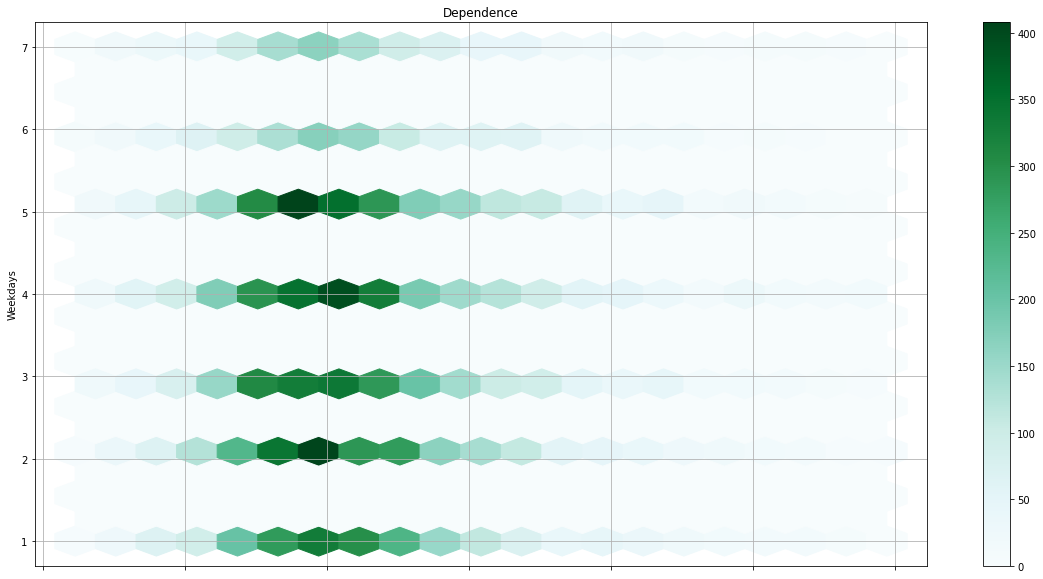

In [196]:
ld.plot(x='last_price', y='weekday_exposition', kind='hexbin', gridsize=20, figsize=(20, 10), grid=True)
plt.title("Dependence")
plt.ylabel("Weekdays")

The data on the date of placement is not entirely clear, what can be said:
* By year of placement: the largest influx of placements and price increases was in 2017-2018. While before this people did not put a high price on real estate for sale, it is possible that this is due to the fact that everyone was afraid of the ruble crashing again, since our data ends in 2014. After that, people were still recovering, saving up and looking at the currency situation.
* By months of placement: the most active months according to the graph are February, March, November and December. The lowest price remains for the month of May
* by days of the week: Our most expensive offers fall on weekdays, unlike weekends, on weekends the price drops sharply. Among them, Thursday and Friday stand out - the price on these days reaches its maximum values.

Let's move on to the next task. We need to select 10 settlements with the largest number of listings and conduct an analysis: calculate the average price per square meter and highlight the settlements with the highest and lowest cost of housing.

In [197]:
top_10_cities = (df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.tolist())
top_10_cities

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'Пушкин',
 'деревня Кудрово',
 'Петергоф']

In [198]:
# Let's display a table with settlements in descending order of price, so we will immediately understand our TOP
most_expensive_meter =(df.query('locality_name in @top_10_cities').pivot_table(index='locality_name', values='price_per_meter').sort_values(by='price_per_meter', ascending=False))
most_expensive_meter

,price_per_meter
locality_name,
Санкт-Петербург,102.292520
Пушкин,98.126592
деревня Кудрово,93.082703
поселок Парголово,89.655846
поселок Мурино,85.765449
Петергоф,81.981889
поселок Шушары,77.701460
Колпино,74.409229
Гатчина,67.714379


Text(0, 0.5, 'Price')

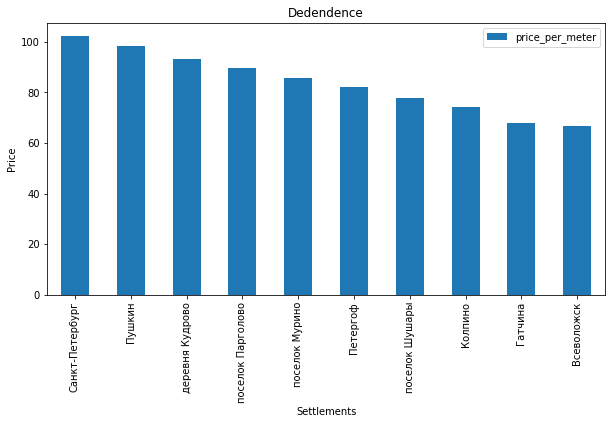

In [199]:
most_expensive_meter.plot(kind='bar', figsize=(10,5))
plt.title("Dedendence")
plt.xlabel("Settlements")
plt.ylabel("Price")

We received all 10 settlements, of which the city, with the highest price per meter - St. Petersburg, with the lowest price - Vsevolozhsk.

Now let's study the offers of apartments in St. Petersburg. It is necessary to find out which area is included in the center.

In [200]:
df.columns.tolist()

['locality_name',
 'last_price',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_area',
 'living_area',
 'kitchen_area',
 'rooms',
 'ceiling_height',
 'floor',
 'floors_total',
 'balcony',
 'first_day_exposition',
 'days_exposition',
 'total_images',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'price_per_meter',
 'weekday_exposition',
 'month_exposition',
 'year_exposition',
 'floor_level',
 'average_living_area',
 'average_kitchen_area']

In [201]:
df_spb = df.loc[df['locality_name'] == "Санкт-Петербург"]
df_spb['city_centers_nearest_km'] = (df_spb['city_centers_nearest']/1000).round()
df_spb.sample()

/tmp/ipykernel_31/2996850290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['city_centers_nearest_km'] = (df_spb['city_centers_nearest']/1000).round()


,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_level,average_living_area,average_kitchen_area,city_centers_nearest_km
16311,Санкт-Петербург,8600,False,False,False,81.0,59.0,10.0,3,2.7,...,2.0,265.0,106.173,1,6,2017,another,0.728395,0.123457,1.0


Text(0, 0.5, 'Price')

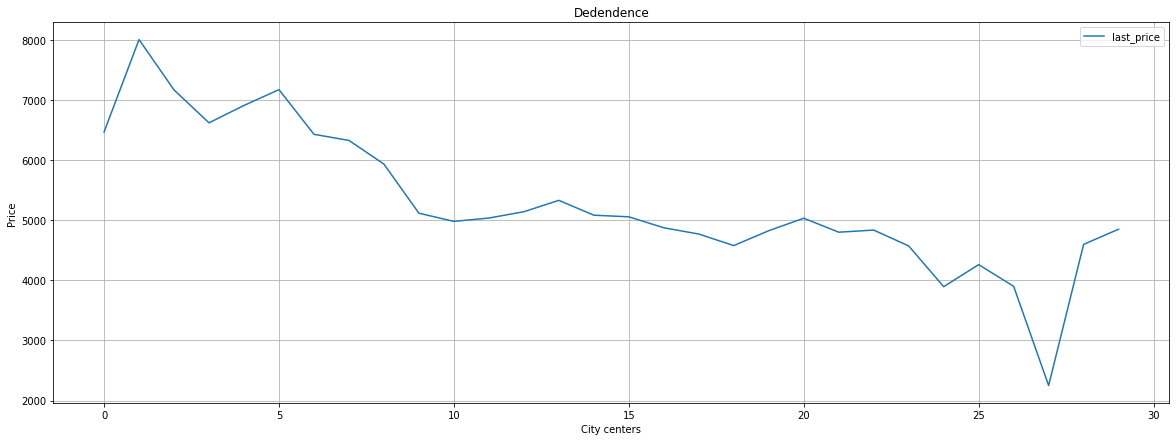

In [202]:
df_spb_price = (
    df_spb.pivot_table(index='city_centers_nearest_km', values='last_price')
)         
df_spb_price.plot(y='last_price', kind='line', grid=True, figsize=(20,7))
plt.title("Dedendence")
plt.xlabel("City centers")
plt.ylabel("Price")

In general, the graph is quite logical - the most expensive apartments are closer to the center, then the price drops. It is also worth noting that from 3 to 7 km the price goes up again, this may be due to quite convenient and large areas for living, with shopping centers or business centers, in which it is more convenient for people to live, besides, quite close to the center. it may also be due to the greater number of rooms in the apartments, as well as newer apartments. As far as we all know, the historical center is usually preserved. I also can’t help but note a sharp surge at the 27th kilometer, most likely the story is the same with it as with the previous ones: amenities / new complex / large shopping center nearby / business center.

Next, we will need to select a segment of apartments in the center and study the area, price, number of rooms, ceiling height. It is also necessary to highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the announcement).

I will select 8km from the center - this is the point where our graph starts to decline.

In [203]:
spb_center = df_spb.query('city_centers_nearest_km <= 8')
spb_center.shape[0]

1113

In [204]:
spb_center.describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,balcony,days_exposition,...,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,average_living_area,average_kitchen_area,city_centers_nearest_km
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1112.000000,1113.000000,1113.000000,...,617.000000,1113.000000,771.00000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,6609.701707,59.215642,34.441087,9.847628,2.125786,2.689704,4.596586,8.361511,0.393531,133.550764,...,492.293355,1.141060,502.73930,114.023813,3.618149,6.862534,2017.224618,0.573062,0.176345,5.557951
std,2170.777652,19.416106,14.099989,3.290014,0.871403,0.089242,3.450819,4.939478,0.777166,125.651802,...,332.479313,1.010224,256.30464,23.633894,1.729638,3.359991,0.851282,0.102624,0.064169,1.888652
min,1900.000000,17.000000,6.000000,2.000000,1.000000,2.400000,1.000000,2.000000,0.000000,3.000000,...,16.000000,0.000000,22.00000,26.250000,1.000000,1.000000,2015.000000,0.193548,0.060606,0.000000
25%,4950.000000,44.000000,22.500000,7.300000,1.000000,2.700000,2.000000,5.000000,0.000000,35.000000,...,300.000000,0.000000,305.50000,97.222000,2.000000,4.000000,2017.000000,0.512821,0.131148,4.000000
50%,6450.000000,57.000000,32.300000,9.100000,2.000000,2.700000,4.000000,6.000000,0.000000,90.000000,...,450.000000,1.000000,495.00000,111.427000,4.000000,7.000000,2017.000000,0.580645,0.163043,6.000000
75%,8100.000000,72.000000,44.000000,12.000000,3.000000,2.700000,6.000000,10.000000,1.000000,193.000000,...,604.000000,2.000000,689.00000,130.263000,5.000000,10.000000,2018.000000,0.650000,0.208333,7.000000
max,11879.000000,113.200000,77.000000,19.400000,5.000000,2.900000,23.000000,28.000000,5.000000,509.000000,...,2295.000000,3.000000,1199.00000,170.312000,7.000000,12.000000,2019.000000,0.901675,0.548387,8.000000


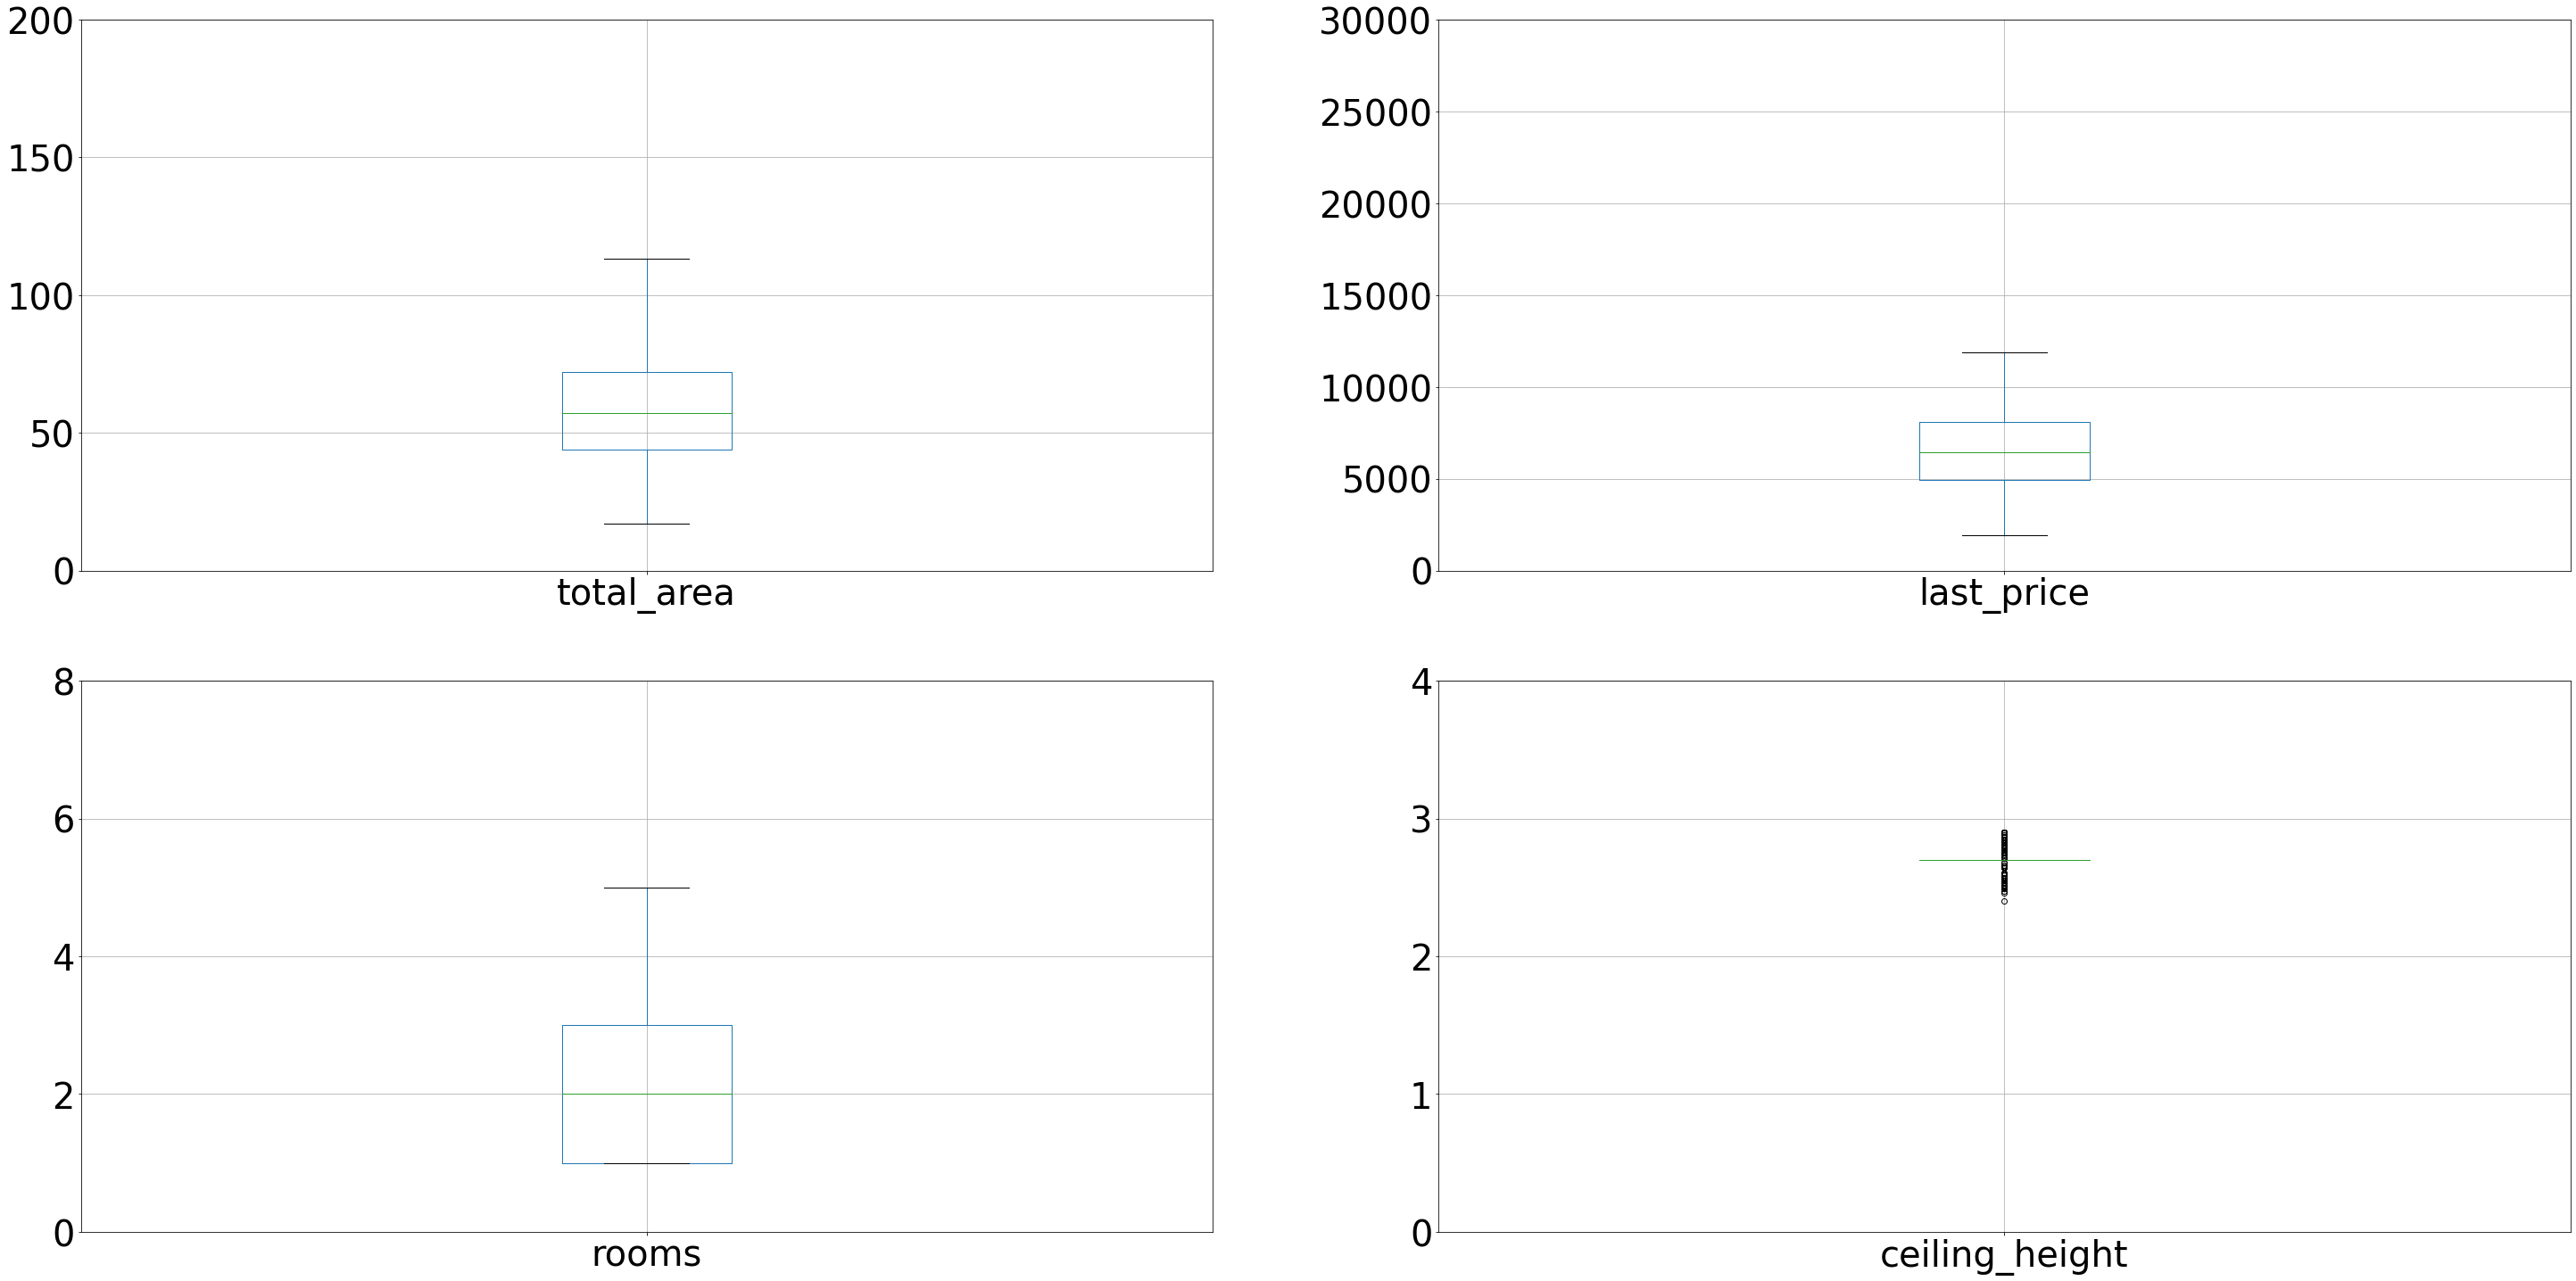

In [205]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [200, 30000, 8, 4]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = spb_center.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Text(0, 0.5, 'Count')

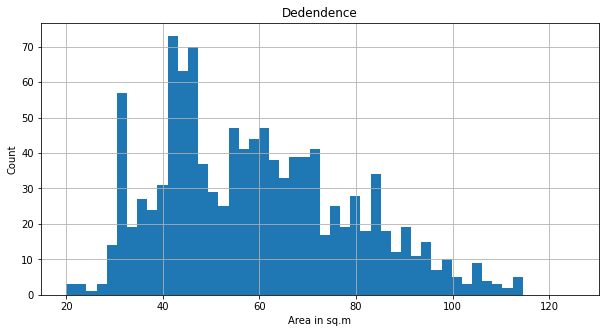

In [206]:
spb_center['total_area'].hist(bins = 50,range=(20, 125), figsize=(10,5))
plt.title("Dedendence")
plt.xlabel("Area in sq.m")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

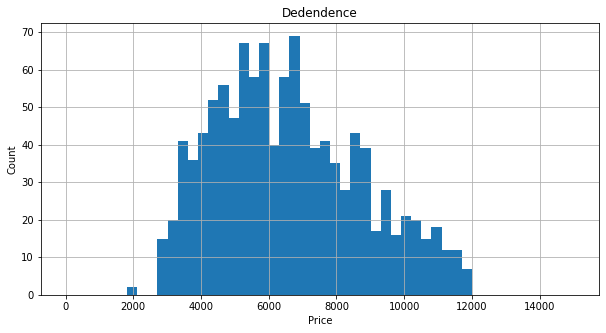

In [207]:
spb_center['last_price'].hist(bins = 50,range=(20, 15000), figsize=(10,5))
plt.title("Dedendence")
plt.xlabel("Price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

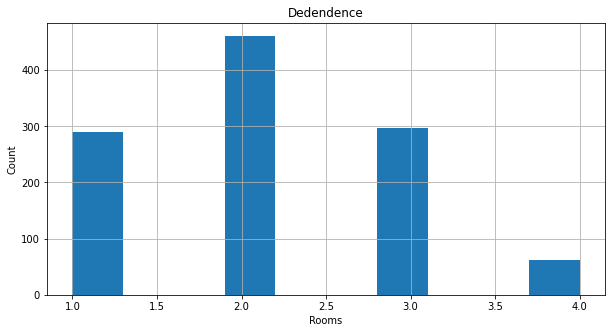

In [208]:
spb_center['rooms'].hist(bins = 10,range=(1, 4), figsize=(10,5))
plt.title("Dedendence")
plt.xlabel("Rooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

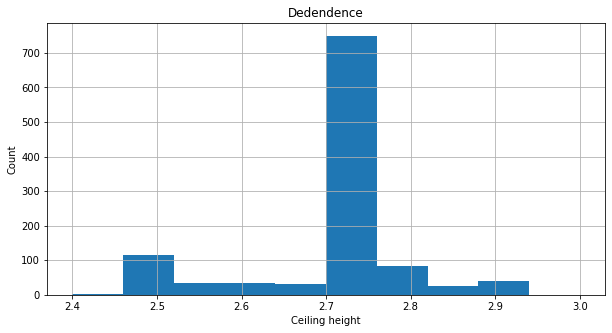

In [209]:
spb_center['ceiling_height'].hist(bins = 10,range=(2.4, 3), figsize=(10,5))
plt.title("Dedendence")
plt.xlabel("Ceiling height")
plt.ylabel("Count")

Conclusions:
* Most of the apartments have an area from 40 to 100 sq.m, we have peaks in around 40-45, 60-70 sq.m
* Most apartments cost from 5 to 10 million, the largest number of apartments have a price of 70 million
* Most apartments have 2-3 rooms
* The absolute majority is occupied by apartments with ceilings of 2.7m

It remains to highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the advertisement).

In [223]:
factors_to_analyze = spb_center[['last_price', 'rooms', 'city_centers_nearest_km', 'floor_level',
                                 'weekday_exposition', 'month_exposition', 'year_exposition']]
data_to_analyze = spb_center[['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']]
factors_to_analyze.sample()

,last_price,rooms,city_centers_nearest_km,floor_level,weekday_exposition,month_exposition,year_exposition
15479,8500,2,4.0,another,3,3,2018


Text(0, 0.5, 'Price')

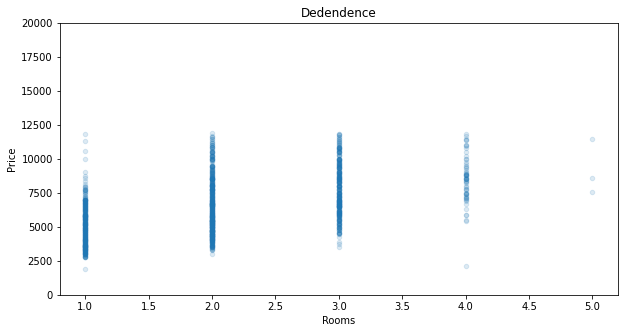

In [211]:
factors_to_analyze.plot(x='rooms', y='last_price', kind='scatter', ylim = (0, 20000), alpha=0.15, figsize=(10,5))
plt.title("Dedendence")
plt.xlabel("Rooms")
plt.ylabel("Price")

In [212]:
print(factors_to_analyze['last_price'].corr(factors_to_analyze['rooms']))

0.4838100269184699


Correlation, like the graph, indicates that with an increase in the number of rooms, the price of an apartment increases - it is logical.

Text(0, 0.5, 'Price')

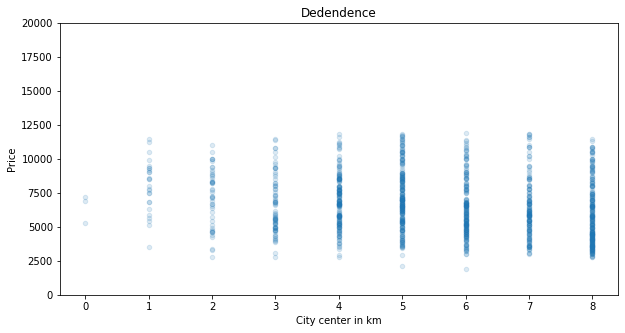

In [213]:
factors_to_analyze.plot(x='city_centers_nearest_km', y='last_price', kind='scatter', ylim = (0, 20000), alpha=0.15, figsize=(10,5))
plt.title("Dedendence")
plt.xlabel("City center in km")
plt.ylabel("Price")

In [214]:
print(factors_to_analyze['city_centers_nearest_km'].corr(factors_to_analyze['last_price']))

-0.19166235060966158


It's not so obvious here, the correlation is approaching zero, but at the same time it goes into negation. It is noticeable on the chart that the highest price is within a radius of 5 km, but starting from the 1st.

The `city_centers_nearest_km` sample is a cluster of apartments that we have already assigned to the city center. She is quite homogeneous on this basis.

(1.0, 15000.0)

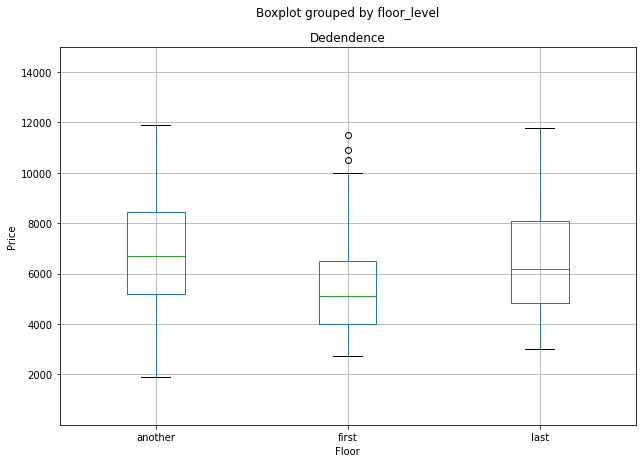

In [215]:
factors_to_analyze = factors_to_analyze[['floor_level', 'last_price']]
factors_to_analyze.boxplot(column = 'last_price', by = 'floor_level', figsize=(10,7))
plt.title("Dedendence")
plt.xlabel("Floor")
plt.ylabel("Price")
plt.ylim(1, 15000)

Everything is about the same here, the first floor is not particularly interesting to anyone, but this time the last floor is on a par with all the others. No wonder - in St. Petersburg, especially in the center, the houses are quite low - 5-6 floors, and all are insanely beautiful, so no one would refuse to live on the top floor.

Text(0, 0.5, 'Years')

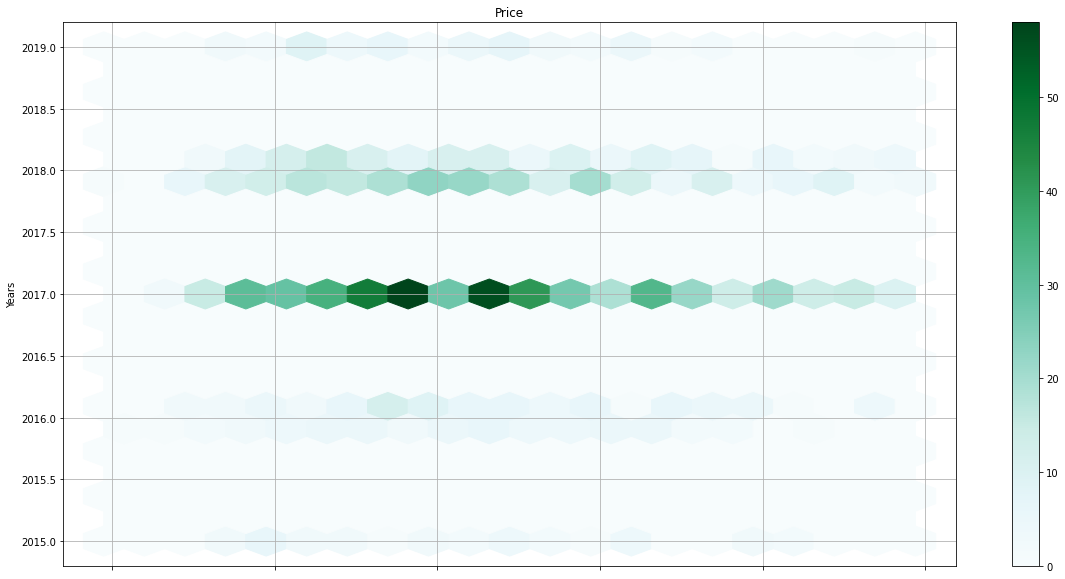

In [224]:
data_to_analyze.plot(x='last_price', y='year_exposition', kind='hexbin', gridsize=20, figsize=(20, 10), grid=True)
plt.title("Price")
plt.ylabel("Years")

Text(0, 0.5, 'Month')

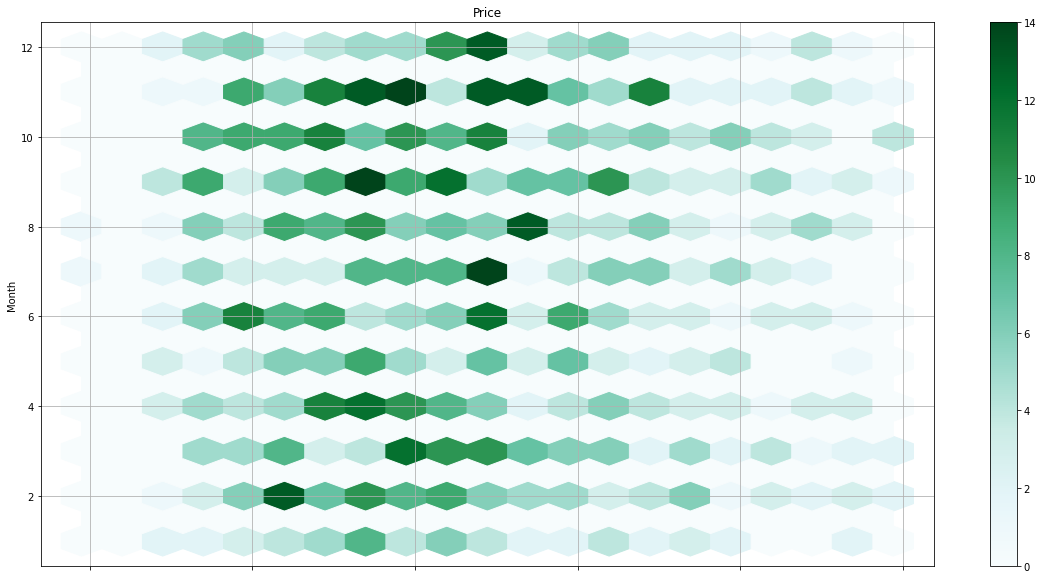

In [225]:
data_to_analyze.plot(x='last_price', y='month_exposition', kind='hexbin', gridsize=20, figsize=(20, 10), grid=True)
plt.title("Price")
plt.ylabel("Month")

Text(0, 0.5, 'Days')

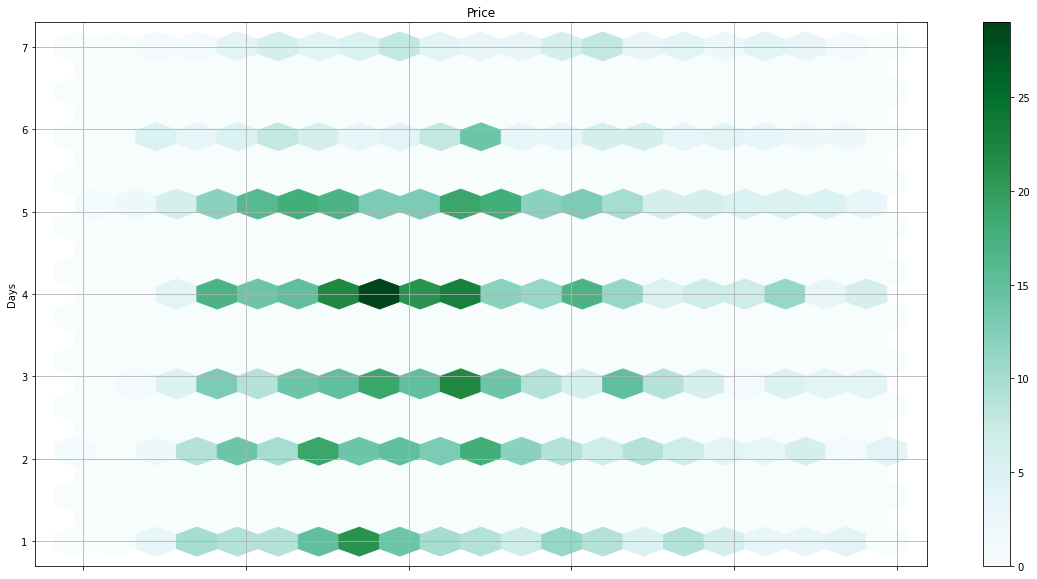

In [226]:
data_to_analyze.plot(x='last_price', y='weekday_exposition', kind='hexbin', gridsize=20, figsize=(20, 10), grid=True)
plt.title("Price")
plt.ylabel("Days")

**Comparison of general conclusions with conclusions for St. Petersburg:**
* The date of posting updates is approximately the same - 2017, working days of the week, in particular Thursday, and also the main months - September, October, November appear there and there
* The situation is also similar for the floors, the only difference is that in St. Petersburg the price for the last floor is higher than usual
* There are slight differences in distance from the price, but I think they are due to the fact that in the latter case we considered the cost of apartments that are already in the center, because of this, the graphs differ, in the first case we had different cities, distant from the center
* The cost of the apartment in both cases increases with the increase in the number of rooms in it

## General conclusion

We have carried out a large analysis of real estate offered for sale in St. Petersburg and its neighboring settlements. I did a detailed pre-processing of the data: corrected the names, changed the order of the columns, filled in the missing data. I supplemented the table with new columns, which later helped me with exploratory analysis.
I did my own analysis:
* Studied some parameters of columns by histograms
* Studied the time of sale of apartments
* Removed rare and outlier values
* Found out what factors most affect the cost of an apartment
* I studied apartments in the very center of St. Petersburg and near it and made conclusions whether the indicators of the city center differ from those in neighboring settlements.

What are the main trends I noticed:
* Most of the apartments are from 30 to 62 sq.m, most of which are occupied by apartments with an area of ​​42-44 sq.m
* On average, apartments cost from 3 to 5 million rubles
* Most of the apartments have only 1 room, but they also get into our top with 2-3 rooms, giving way to one-room apartments quite a bit
* The most common are apartments with ceilings of 2.6-2.9 m, followed by apartments with ceilings of 2.3-2.5 m
* An apartment stays on average for up to 180 days, it is during this period of time that they are usually bought. There is also a small interesting pattern - ads disappear for 45 and 60 days. Most likely this is due to the platform itself - if there is no interaction with the ad, it is automatically deleted
* By the date of placement, little can be said: most expensive apartments are exhibited on weekdays, Thursday and Friday stand out from them - the price on these days reaches maximum values; the most active months of accommodation are February, March and November. Over the years - an influx of expensive ads occurred in 2017, I suggested that this could be caused by the collapse of the ruble in 2014, everyone was wary, watched the situation and eventually raised apartment prices when they realized that the ruble was unlikely to grow
* The most expensive apartments are located within a radius of 8 kilometers, then the price drops, which is not surprising, the closer to the historical center and all the sights, the higher the owner will appreciate his apartment. There is also a spike in prices at 27 kilometers from the center - most likely they just built a new modern residential complex, a shopping or business center, so the price has risen
* The highest price by floor falls on the inner floors The first and last price is much lower

St. Petersburg trends:
* Most apartments have an area of ​​40-100 sq.m, most of which are apartments with an area of ​​40-45, 60-70 sq.m
* On average, apartments cost from 5 to 10 million rubles
* Most apartments have 2-3 rooms
* The absolute majority is occupied by apartments with ceilings 2.7 m high
* By date of placement, the situation does not differ much from the general data
* The situation is also similar for the floors, except for the high price for the last floor. In St. Petersburg, it is really worth living on the top floor, there are wonderful views of low buildings and beautiful roofs.
* The cost of the apartment also increases with the increase in the number of rooms in it